# Data Mining Project
### Giorgio Donati, g.donati24@studenti.unipi.it
### Pietro Francaviglia, p.francaviglia1@studenti.unipi.it
#### A.Y. 2021-2022


## Libraries and datasets

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

from t3_constants import *
from t3_utility import *

# Bagging
## Training

In [2]:
with open(f'{PICKLE_FOLDER}{TRAIN}{X}.pkl', 'rb') as f:
    train_x = pickle.load(f)
with open(f'{PICKLE_FOLDER}{TRAIN}{Y}.pkl', 'rb') as f:
    train_y = pickle.load(f)

In [3]:
# parameters dictionary for Bagging grid search
param_d = {
    CRT: ['gini', 'entropy'],
    MSL : [1, 3, 5],
    NEST: np.logspace(1, 2.5, num=10).astype(int).tolist()
}

# iteration on parameters to collect results
combinations = itertools.product(*(param_d[key] for key in sorted(param_d)))

results = []

for criterion, min_samples_leaf, n_estimators in combinations:
    model = BaggingClassifier(
        base_estimator=tree.DecisionTreeClassifier(criterion=criterion, min_samples_leaf=min_samples_leaf),
        n_estimators=n_estimators
    )
    
    mean_val_score, std_val_score = cross_validation_summary(model, train_x.values, train_y.values)
    res = criterion, min_samples_leaf, n_estimators, mean_val_score, std_val_score
    results.append(res)

# print top 5 combination results
bagging_results_df = pd.DataFrame(results, columns=sorted(param_d)+[MVS, SVS])

In [4]:
bagging_results_df.sort_values(MVS, ascending = False).head(10)

,criterion,min_samples_leaf,n_estimators,mean_val_score,std_val_score
35,entropy,1,68,0.883314,0.034317
7,gini,1,146,0.878502,0.044068
36,entropy,1,100,0.878489,0.033507
38,entropy,1,215,0.876952,0.017474
37,entropy,1,146,0.876940,0.022047
47,entropy,3,146,0.876927,0.022073
34,entropy,1,46,0.875314,0.027282
39,entropy,1,316,0.873740,0.024695
11,gini,3,14,0.873702,0.040445
9,gini,1,316,0.872127,0.040312


In [5]:
bagging_results_df.groupby(CRT)[[MVS, SVS]].mean()

,mean_val_score,std_val_score
criterion,,
entropy,0.861206,0.032139
gini,0.857418,0.037637


In [6]:
bagging_results_df.groupby(MSL)[[MVS, SVS]].mean()

,mean_val_score,std_val_score
min_samples_leaf,,
1,0.867573,0.033152
3,0.861255,0.034308
5,0.849107,0.037205


In [7]:
bagging_results_df.groupby(NEST)[[MVS, SVS]].mean()

,mean_val_score,std_val_score
n_estimators,,
10,0.840967,0.034935
14,0.858269,0.035805
21,0.854019,0.031520
31,0.860933,0.033522
46,0.859860,0.036657
68,0.864400,0.036358
100,0.862254,0.040214
146,0.865475,0.031444
215,0.864667,0.034951


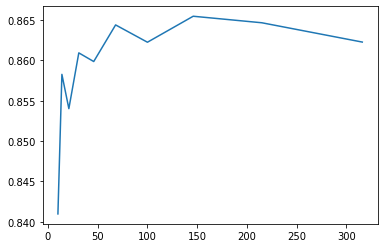

In [8]:
plt.plot(bagging_results_df.groupby(NEST)[NEST].first(), bagging_results_df.groupby(NEST)[MVS].mean())
plt.show()

## Testing

In [10]:
# gini result to be better
best_result = bagging_results_df.sort_values(MVS).tail(1)

# best model
test_model = BaggingClassifier(
    base_estimator=tree.DecisionTreeClassifier(criterion=best_result[CRT].values[0], min_samples_leaf=best_result[MSL].values[0]),
    n_estimators=best_result[NEST].values[0]
)

_ = test_model.fit(train_x, train_y)

In [11]:
with open(f'{PICKLE_FOLDER}{TEST}{X}.pkl', 'rb') as f:
    test_x = pickle.load(f)
with open(f'{PICKLE_FOLDER}{TEST}{Y}.pkl', 'rb') as f:
    test_y = pickle.load(f)

In [12]:
# Around 
test_model.score(test_x, test_y)

0.910828025477707